Emily Picinich

DSC630

9/28/25

3.2 Assignment: Using Data to Improve MLB Attendance

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
# Load data into a DataFrame
df = pd.read_csv('dodgers-2022.csv')

In [5]:
# Preview the data
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [7]:
# View a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [9]:
# View descriptive statistics
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [11]:
# Check missing data
df.isna().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

In [13]:
# Check for duplicate rows in the DataFrame
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in df: {num_duplicates}")

Number of duplicate rows in df: 0


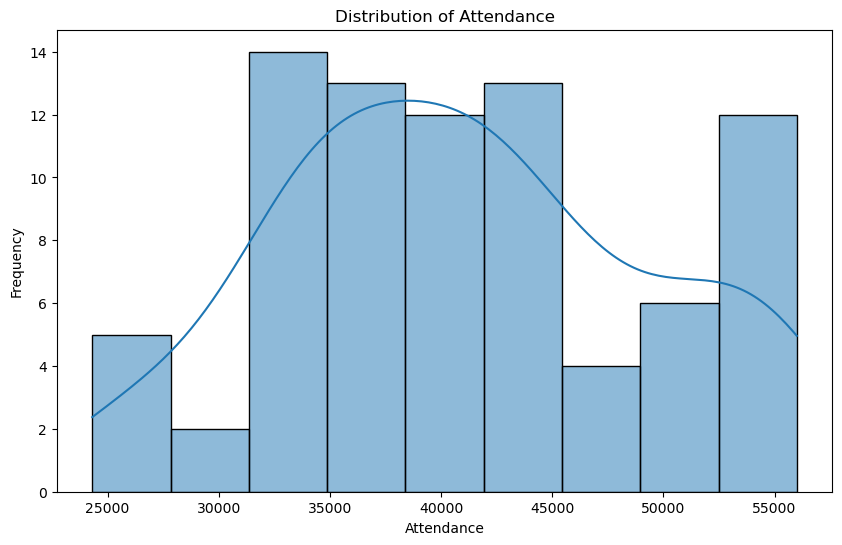

In [17]:
# Attendance distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, 
             x='attend',
             kde=True, 
             bins=9
            )
plt.title('Distribution of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

Attendance ranged from just under 30,000 to about 56,000, with most games drawing between 35,000 and 45,000 fans. The distribution is not perfectly normal; instead, it shows a bimodal pattern with two noticeable peaks. One concentration appears around the mid-30,000 to 40,000 range, while another occurs in the 50,000 to 55,000 range.

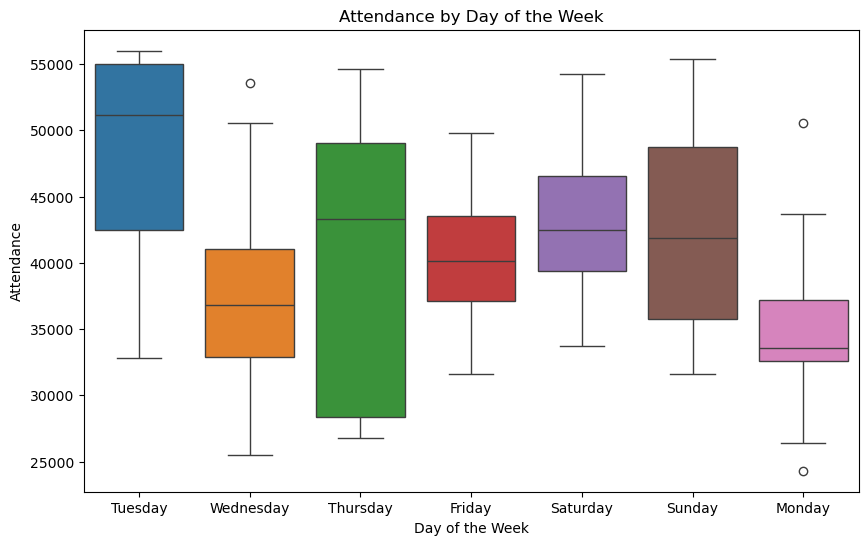

In [20]:
# Attendance by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
            x='day_of_week', 
            y='attend', 
            hue='day_of_week',
            legend=False
           )
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.show()

The plot suggests that attendance patterns are heavily influenced by the day of the week: Tuesdays consistently drew large crowds, weekends were strong but variable, and early-week games on Mondays and Wednesdays tended to have smaller and less consistent turnouts.

In [23]:
# Average attendance by day of the week
df['attend'].groupby(df['day_of_week']).mean().round(0).astype(int).sort_values(ascending=False)

day_of_week
Tuesday      47741
Saturday     43073
Sunday       42269
Thursday     40407
Friday       40117
Wednesday    37585
Monday       34966
Name: attend, dtype: int64

In [25]:
# Check if the differences in attendance across days of the week are statistically significant
# Group attendance by day of week
groups = [group['attend'].values for name, group in df.groupby('day_of_week')]

# Perform one-way ANOVA
anova_result = stats.f_oneway(*groups)

print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

F-statistic: 3.6440323261932344
p-value: 0.003185034232658946


Because the p-value is well below 0.05, we can reject the null hypothesis that attendance is the same across all days. This means that day of the week does have a statistically significant effect on attendance.

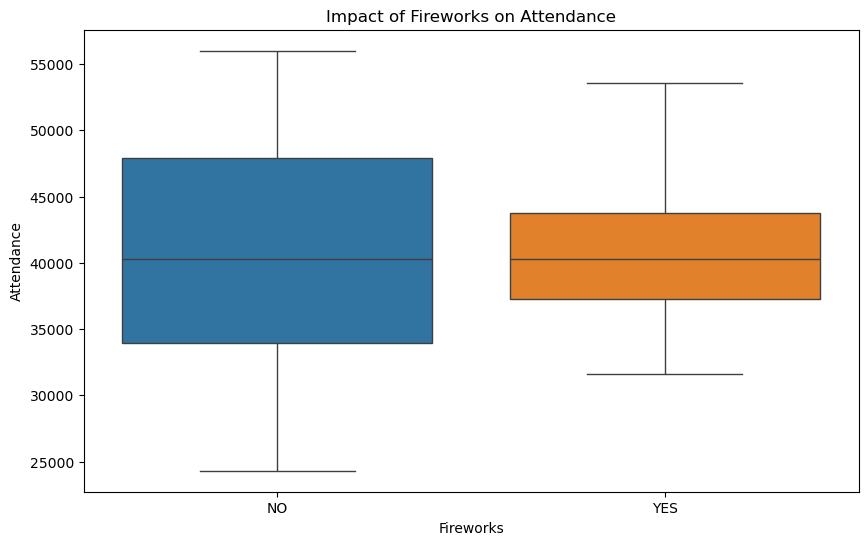

In [28]:
# Promotions impact: fireworks
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
            x='fireworks', 
            y='attend', 
            hue='fireworks',
            legend=False
           )
plt.title('Impact of Fireworks on Attendance')
plt.xlabel('Fireworks')
plt.ylabel('Attendance')
plt.show()

Interestingly, the medians are almost identical, both sitting just above 40,000, suggesting that fireworks nights did not substantially increase average turnout. However, the distribution tells a different story: games without fireworks had a much wider spread, ranging from under 25,000 to more than 55,000 fans. In contrast, games with fireworks drew more consistent crowds, with attendance clustered more tightly between about 35,000 and 50,000.

This pattern indicates that while fireworks nights did not necessarily push attendance higher on average, they may have stabilized turnout by ensuring a baseline level of interest. Non-fireworks games could either underperform or sell out depending on factors like day of the week, opponent, or other promotions, while fireworks games consistently attracted solid crowds.

In [31]:
# Average attendance by fireworks
df['attend'].groupby(df['fireworks']).mean().round(0).astype(int).sort_values(ascending=False)

fireworks
YES    41078
NO     41032
Name: attend, dtype: int64

In [33]:
# Check if the difference between fireworks and non-fireworks games is statistically significant
# Split attendance into two groups
fireworks_yes = df[df['fireworks']=='YES']['attend']
fireworks_no = df[df['fireworks']=='NO']['attend']

# Perform independent t-test
ttest_result = stats.ttest_ind(fireworks_yes, 
                               fireworks_no, 
                               equal_var=False
                              )

print("t-statistic:", ttest_result.statistic)
print("p-value:", ttest_result.pvalue)

t-statistic: 0.024331082837717514
p-value: 0.9807652931356925


Since the p-value is extremely high (much greater than 0.05), we fail to reject the null hypothesis. This means there is no statistically significant difference in attendance between fireworks and non-fireworks games. In other words, fireworks promotions did not have a measurable impact on average attendance in 2022, as attendance was essentially the same whether fireworks were offered or not.

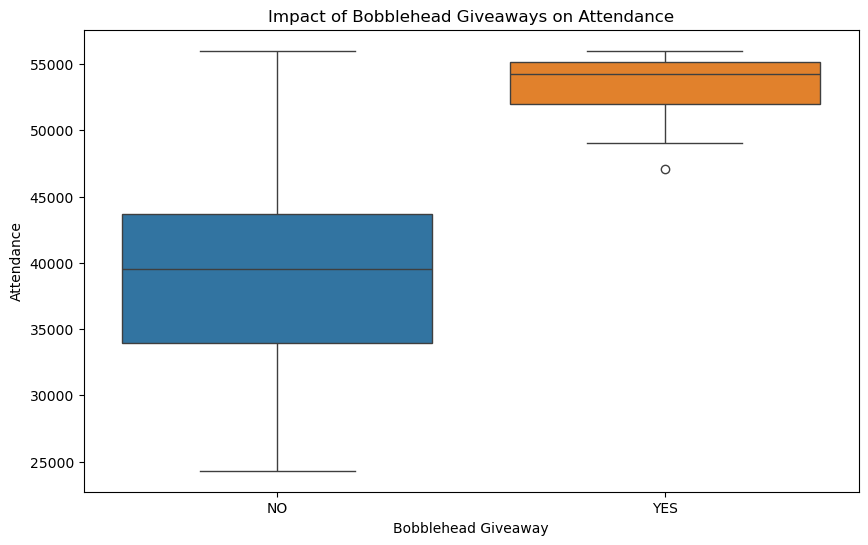

In [36]:
# Promotions impact: bobblehead
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
            x='bobblehead', 
            y='attend', 
            hue='bobblehead',
            legend=False
           )
plt.title('Impact of Bobblehead Giveaways on Attendance')
plt.xlabel('Bobblehead Giveaway')
plt.ylabel('Attendance')
plt.show()

For games without a bobblehead promotion, attendance varied widely, ranging from under 25,000 to nearly 56,000 fans, with a median just under 40,000. By contrast, games with bobblehead giveaways had consistently higher attendance. Their median was above 55,000, and nearly all bobblehead games drew between 50,000 and 56,000 fans, right near stadium capacity. The much narrower spread for bobblehead games suggests that these promotions reliably attracted very large crowds.

In [39]:
# Check if the difference between bobblehead and non-bobblehead games is statistically significant
# Split attendance into two groups: with and without bobblehead giveaways
bobblehead_yes = df[df['bobblehead']=='YES']['attend']
bobblehead_no = df[df['bobblehead']=='NO']['attend']

# Perform independent t-test
ttest_result = stats.ttest_ind(bobblehead_yes, bobblehead_no, equal_var=False)

print("t-statistic:", ttest_result.statistic)
print("p-value:", ttest_result.pvalue)

t-statistic: 11.456457357071585
p-value: 2.9401536228069515e-13


Because the p-value is far below 0.05 (essentially zero), we can reject the null hypothesis with extremely high confidence. This means there is a statistically significant difference in attendance between games with bobblehead giveaways and those without. The very large t-statistic (11.46) also indicates that the difference is not just statistically significant, but highly substantial. This aligns with what the boxplot showed: bobblehead games consistently drew near-capacity crowds (around 55,000), while non-bobblehead games had much lower and more variable attendance.

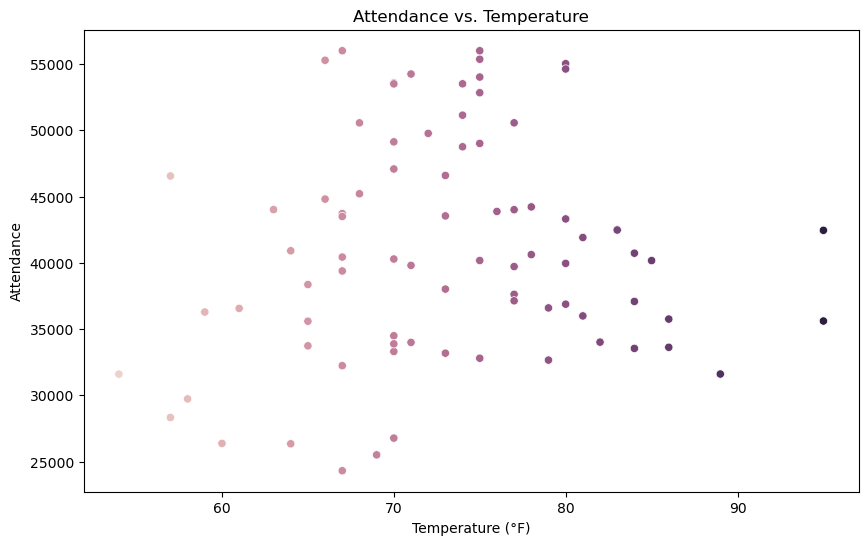

In [42]:
# Attendance vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='temp', 
                y='attend', 
                hue='temp', 
                legend=False
               )
plt.title('Attendance vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Attendance')
plt.show()

From the plot, there is no strong linear relationship between the two variables. Attendance is spread widely across the temperature range, from the mid-50s to the mid-90s °F, without a clear upward or downward trend. For example, high attendance (50,000–55,000) occurred in both cooler games (around 65–70°F) and warmer games (around 75–80°F). Similarly, lower attendance (below 30,000) also happened in both cool and warm conditions. In short, temperature did not meaningfully predict attendance, as fans turned out in strong numbers regardless of weather.

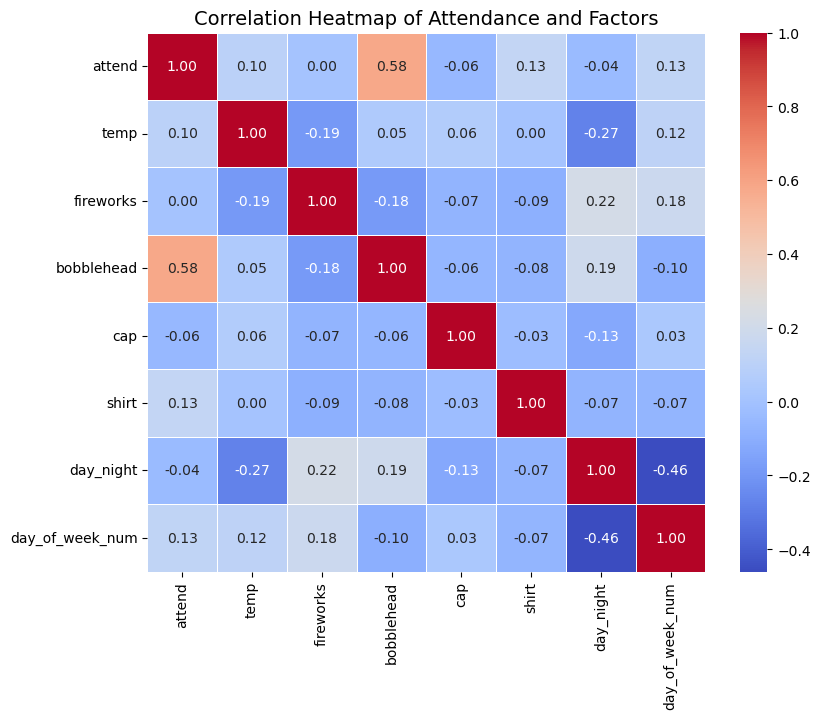

In [45]:
# Generate a correlation heatmap
# Copy dataset
df_corr = df.copy()

# Convert YES/NO categorical columns
yes_no_cols = ['fireworks', 'bobblehead', 'cap', 'shirt']
for col in yes_no_cols:
    df_corr[col] = df_corr[col].map({'YES': 1, 'NO': 0})

# Encode day_night (Day=0, Night=1)
df_corr['day_night'] = df_corr['day_night'].map({'Day': 0, 'Night': 1})

# Encode day_of_week as numeric (Monday=1, ..., Sunday=7)
day_map = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 
    'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df_corr['day_of_week_num'] = df_corr['day_of_week'].map(day_map)

# Select numeric columns for correlation
numeric_cols = ['attend', 'temp', 'fireworks', 'bobblehead', 
                'cap', 'shirt', 'day_night', 'day_of_week_num']

# Compute correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Attendance and Factors", fontsize=14)
plt.show()

The strongest relationship is between bobblehead giveaways and attendance, with a correlation of 0.58, a moderately strong positive relationship. This confirms what we saw earlier: bobblehead nights reliably boosted attendance. Other promotional giveaways such as caps (–0.06) and shirts (0.13) show little to no correlation, meaning they didn’t significantly influence turnout. Fireworks also had virtually no effect (0.00), aligning with the earlier t-test results.

Temperature (0.10) has a weak positive correlation with attendance, but it’s too small to matter in practice. Similarly, day_of_week_num (0.13) suggests a slight increase toward later days in the week (like weekends), but again, the effect is minor compared to promotions. Interestingly, day_night has a very weak negative correlation (–0.04), suggesting attendance didn’t differ meaningfully between day and night games.

Overall, the heatmap confirms that bobblehead giveaways were by far the most influential factor driving attendance, while other factors like fireworks, temperature, and other giveaways had little to no consistent impact. Day of the week plays a role, but it’s less important compared to special promotions.

In [48]:
# Average attendance by opponent
df['attend'].groupby(df['opponent']).mean().round(0).astype(int).sort_values(ascending=False)

opponent
Angels       49777
Mets         49586
Nationals    49267
White Sox    46382
Cubs         44207
Padres       42092
Phillies     41897
Cardinals    40853
Marlins      40665
Reds         40649
Rockies      39631
Snakes       39315
Giants       39296
Pirates      38019
Astros       35383
Brewers      35359
Braves       32245
Name: attend, dtype: int64

The table of averages shows that the Angels, Mets, and Nationals produced the highest attendance, each averaging close to 50,000 fans per game. Other teams like the White Sox and Cubs also performed well, averaging well above 40,000 fans, while teams such as the Padres and Phillies generated moderately strong attendance in the low 40,000s.

At the other end of the spectrum, games against the Braves, Brewers, and Astros had some of the weakest turnouts, with average crowds closer to the mid-30,000s. The Pirates and Giants were also on the lower side, averaging below 40,000. These results suggest that not all marquee franchises or rivals (like the Giants) consistently guaranteed large crowds, and some matchups failed to generate strong interest despite other potential draws.

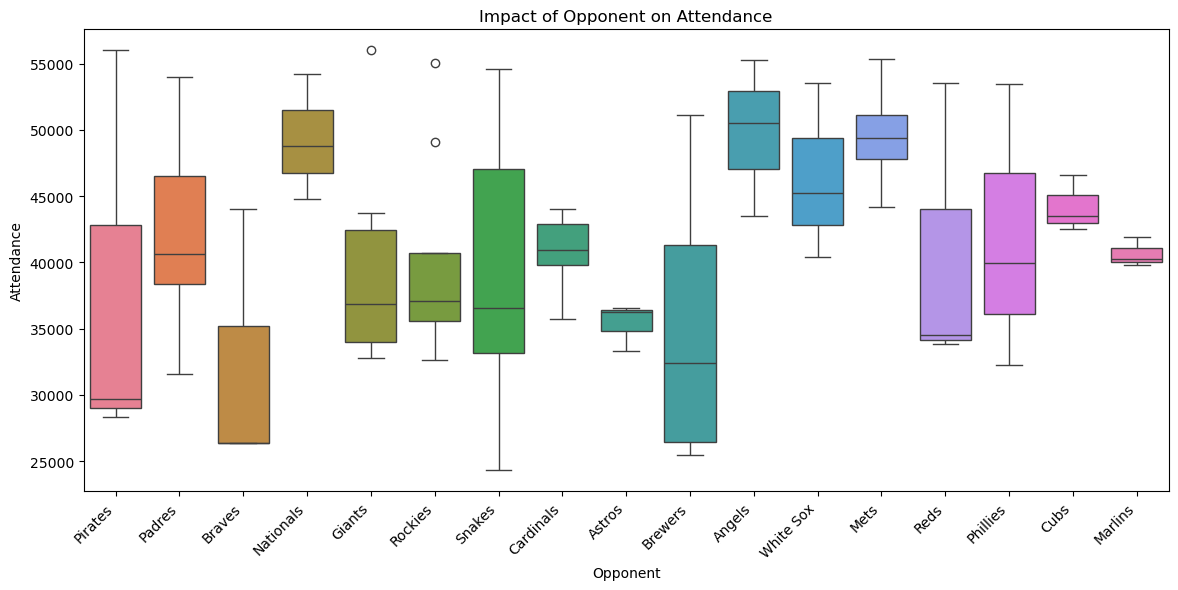

In [50]:
# Opponent impact on attendance
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, 
            x='opponent', 
            y='attend', 
            hue='opponent',
            legend=False
           )
plt.title('Impact of Opponent on Attendance')
plt.xlabel('Opponent')
plt.ylabel('Attendance')
plt.xticks(rotation=45, 
           horizontalalignment='right'
          )
plt.show()

The boxplot reinforces the patterns from the average attendance numbers while also revealing the variability in attendance across different opponents. Matchups with the Angels and Mets show high median attendance and relatively narrow spreads, indicating consistently strong turnouts. By contrast, opponents like the Brewers and Braves not only had lower averages but also displayed greater variability, with some games dipping well below 30,000. Teams such as the Nationals, White Sox, and Reds showed wide spreads, suggesting that while some games drew very large crowds, others were far less popular, possibly depending on external factors.

Together, the two views highlight that both the identity of the opponent and the consistency of fan interest mattered. The Angels and Mets reliably packed the stadium, while teams like the Brewers and Braves consistently underperformed. Other opponents fell in between, showing that attendance likely fluctuated depending on the specific context of each matchup.

In [70]:
import statsmodels.formula.api as smf

# Encode YES/NO and day/night as before
map_yn = {'YES': 1, 'NO': 0}
df_reg = df.copy()
df_reg['fireworks']  = df_reg['fireworks'].map(map_yn)
df_reg['bobblehead'] = df_reg['bobblehead'].map(map_yn)
df_reg['cap']        = df_reg['cap'].map(map_yn)
df_reg['shirt']      = df_reg['shirt'].map(map_yn)
df_reg['day_night']  = df_reg['day_night'].map({'Day': 0, 'Night': 1})

# Build regression including skies as categorical
model = smf.ols(
    'attend ~ temp + fireworks + bobblehead + cap + shirt + day_night + C(day_of_week) + C(opponent) + C(skies)',
    data=df_reg
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     3.888
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           1.13e-05
Time:                        13:04:50   Log-Likelihood:                -798.10
No. Observations:                  81   AIC:                             1656.
Df Residuals:                      51   BIC:                             1728.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The regression model performed well, with an R² value of 0.689, showing that nearly 69 percent of the variation in attendance is explained by the factors included. This is a strong result, and the highly significant F-statistic (p < 0.001) confirms that the model as a whole provides a meaningful explanation of attendance patterns.

Among the predictors, bobblehead giveaways once again stand out as the most influential factor. With a coefficient of approximately +11,700 and a p-value well below 0.001, bobblehead nights boosted attendance by nearly 12,000 fans on average, making them the single strongest driver of turnout. Fireworks also retained a statistically significant positive effect of about +1,900 fans (p = 0.016), showing that these promotions, while less impactful than bobbleheads, still contributed to higher attendance once other variables were accounted for. Day of the week effects remained important as well. Tuesday, Thursday, Saturday, and Sunday all showed significant positive impacts ranging from about +17,500 to +20,200, confirming that weekends and select midweek games consistently drew larger crowds. Mondays were weaker, but the negative effect was no longer statistically significant at conventional levels.

Other promotions, such as caps and shirts, showed no significant impact, suggesting they were not effective at increasing turnout. Similarly, temperature and day/night status were insignificant, reinforcing earlier findings that weather and game timing did not strongly influence attendance. Adding skies into the model also revealed no meaningful impact, as the coefficient for cloudy days was small and not statistically significant, indicating that weather conditions beyond temperature had little effect on turnout.

Opponent effects again provided important insights. Relative to the baseline opponent, games against the Braves, Brewers, and Diamondbacks all showed statistically significant declines in attendance, with reductions ranging from about 10,700 to 12,700 fans. The Astros also showed a large negative coefficient of nearly 9,700, but this effect was not statistically significant. Other teams such as the Giants, Padres, and Pirates also registered negative coefficients, though these were not significant either, suggesting that not all opponents carried the same weight in drawing fans.

Taken together, the results strongly reinforce that bobblehead giveaways were by far the most powerful attendance driver, consistently filling the stadium close to capacity. Fireworks provided a smaller but measurable boost, and scheduling effects were clear, with weekends and select midweek games outperforming Mondays. Opponent identity also mattered, with games against the Braves, Brewers, and Diamondbacks drawing significantly fewer fans, while weather-related factors like skies, temperature, and day/night distinctions had little to no effect. This confirms that promotions and the competitive context were the most important determinants of attendance.

In [85]:
# Extract opponent effects from regression coefficients
opp_effects = model.params[model.params.index.str.contains("C(opponent)", regex=False)]

# Clean labels
opp_effects_clean = opp_effects.rename(lambda x: x.replace("C(opponent)[T.", "").replace("]", ""))

# Sort by effect
print(opp_effects_clean.sort_values(ascending=False))

White Sox      435.828928
Cubs            52.037134
Nationals    -1209.088538
Mets         -1850.739946
Phillies     -4638.244267
Cardinals    -4843.335366
Padres       -4968.898091
Marlins      -5522.470169
Pirates      -7783.435407
Rockies      -7887.667235
Giants       -8004.833512
Reds         -9341.795285
Astros       -9743.480059
Snakes      -10960.035735
Braves      -12312.834625
Brewers     -12753.162680
dtype: float64


The regression results reveal notable differences in how various opponents influenced the Dodgers’ home game attendance in 2022. In this model, the Angels served as the baseline opponent, making them the reference point against which all other teams are compared. Since the Freeway Series with the Angels consistently attracted some of the largest crowds, it is not surprising that most other teams display negative coefficients, indicating that their matchups drew fewer fans on average.

A couple of opponents, however, managed to post small positive coefficients. The White Sox and Cubs both registered slightly above-zero values, suggesting that their games attracted marginally more fans compared to the baseline. Still, these effects were not statistically significant, meaning they could just as easily reflect chance variation rather than a consistent pattern.
Most other teams showed negative coefficients, with some being modest and others more pronounced. The Nationals and Mets, for example, had relatively small declines in attendance compared to the Angels, leaving them closer to neutral. On the other hand, teams like the Phillies, Cardinals, Padres, and Marlins were associated with more noticeable drops in turnout, though not as severe as the lowest-ranked opponents.

At the bottom end of the spectrum, several teams had particularly large negative effects. The Brewers (–12,753), Braves (–12,312), and Diamondbacks (–10,960) all stood out for drawing significantly smaller crowds compared to the Angels, highlighting that these games were consistently less appealing to fans. The Astros (–9,743), Reds (–9,341), and Giants (–8,004) also produced substantial declines, suggesting that despite some of these teams being historically competitive or rivals, they did not match the Angels in terms of fan draw.

Overall, the analysis confirms that the identity of the opponent played a meaningful role in shaping attendance. The Angels served as the strongest benchmark, reliably producing near-capacity crowds, while certain other matchups, particularly against the Brewers, Braves, and Diamondbacks, were much weaker in appeal. These findings reinforce the broader conclusion that while promotions like bobblehead giveaways were the most powerful attendance drivers, the opponent remained a critical factor in determining turnout levels across the season.

# Recommendations

The most consistent and powerful driver of attendance was bobblehead giveaways. On average, these promotions boosted turnout by nearly 12,000 fans per game, reliably producing near-capacity crowds. Management should continue to feature bobblehead nights prominently throughout the season, particularly during games that might otherwise struggle to draw large audiences, such as Mondays or when facing weaker opponents like the Brewers, Braves, or Diamondbacks. Targeting promotional giveaways strategically rather than spreading them evenly could help lift attendance in traditionally weaker matchups.

Fireworks promotions also demonstrated a small but statistically significant positive effect once other factors were considered. While not as impactful as bobbleheads, fireworks should be maintained as a secondary promotional tool, particularly for midweek games where attendance tends to lag. By pairing fireworks with family-friendly weekend series, management can also broaden their appeal to casual fans.

The analysis further shows that day of the week strongly influences turnout, with Tuesdays, Thursdays, Saturdays, and Sundays performing best, while Mondays lag behind. Since scheduling is largely controlled by Major League Baseball, management cannot eliminate Monday games, but they can offset the disadvantage by concentrating their strongest promotions, themed events, or premium giveaways on those nights. This would help turn historically weak games into better-attended events.

Opponents also played a role. The Angels, Mets, and Nationals consistently produced near-capacity crowds, while the Brewers, Braves, and Diamondbacks significantly underperformed. For low-demand matchups, management should be especially aggressive with marketing campaigns and promotions. Special ticket pricing, group discounts, or exclusive fan experiences could help close the gap for games against less attractive opponents. Conversely, games against high-demand rivals like the Angels can sustain premium pricing, as attendance is strong even without additional incentives.

Finally, the analysis found that caps, shirts, temperature, and day/night status did not significantly affect attendance, suggesting that resources may be better focused on proven strategies rather than on promotions with limited impact.

In summary, to maximize attendance, Dodgers management should prioritize expanding bobblehead promotions, targeting fireworks and family-friendly events for weaker nights, and directing marketing resources toward less popular matchups and early-week games. By strategically aligning promotions and pricing with demand patterns, the team can strengthen turnout across the full schedule while continuing to sell out marquee series.